Goals:
======

- Read an ASDF file
- Use tools for looking at the file and searching for attributes
- Display an image contained in the file
- Access and modify metadata
- Write the file to disk

The file jwst.asdf is presumed to be in your current directory (see xxx for instructions on how to get all files used in this tutorial)

In [1]:
import numpy as np
import asdf
from matplotlib import pyplot as plt

Load ASDF file
--------------

In [7]:
af = asdf.open('jwst.asdf')
# Get some info about the contents
af.info()

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 3.2.0
├─history (dict)
│ └─extensions (list) ...
├─_fits_hash (str): 93cf4256596bd7a6d20913c3d0f6e1ab9d3a8647c02771c5c752b2311efd9456
├─con (NDArrayType): shape=(1, 4159, 6353), dtype=int32
├─data (NDArrayType): shape=(4159, 6353), dtype=float32
├─err (NDArrayType): shape=(4159, 6353), dtype=float32
├─hdrtab (NDArrayType): shape=(24,), dtype=void31504
├─meta (dict)
│ ├─aperture (dict) ...
│ ├─asn (dict) ...
│ ├─background (dict) ...
│ ├─bunit_data (str): MJy/sr
│ └─40 not shown
├─var_flat (NDArrayType): shape=(4159, 6353), dtype=float32
├─var_poisson (NDArrayType): shape=(4159, 6353), dtype=float32
├─var_rnoise (NDArrayType): shape=(4159, 6353), dtype=float32
└─wht (NDArrayType): shape=(4159, 6353), dtype=float32
Some nodes not shown.


/Users/perry/miniconda3/envs/jwstmem/lib/python3.11/site-packages/asdf/_asdf.py:359: AsdfWarning: File 'file:///Users/perry/github/asdf-adass2024/tutorial/jwst.asdf' was created with extension URI 'asdf://astropy.org/astropy/extensions/units-1.0.0' (from package asdf-astropy==0.6.1), which is not currently installed
  warnings.warn(msg, AsdfWarning)


In [ ]:
# The file has lots of content so some options are needed to see it all
af.info(max_rows=200)

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 3.2.0
├─history (dict)
│ └─extensions (list) ...
├─_fits_hash (str): 93cf4256596bd7a6d20913c3d0f6e1ab9d3a8647c02771c5c752b2311efd9456
├─con (NDArrayType): shape=(1, 4159, 6353), dtype=int32
├─data (NDArrayType): shape=(4159, 6353), dtype=float32
├─err (NDArrayType): shape=(4159, 6353), dtype=float32
├─hdrtab (NDArrayType): shape=(24,), dtype=void31504
├─meta (dict)
│ ├─aperture (dict) ...
│ ├─asn (dict) ...
│ ├─background (dict) ...
│ ├─bunit_data (str): MJy/sr
│ └─40 not shown
├─var_flat (NDArrayType): shape=(4159, 6353), dtype=float32
├─var_poisson (NDArrayType): shape=(4159, 6353), dtype=float32
├─var_rnoise (NDArrayType): shape=(4159, 6353), dtype=float32
└─wht (NDArrayType): shape=(4159, 6353), dtype=float32
Some nodes not shown.
root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Develop

/Users/perry/miniconda3/envs/jwstmem/lib/python3.11/site-packages/asdf/_asdf.py:359: AsdfWarning: File 'file:///Users/perry/github/asdf-adass2024/tutorial/jwst.asdf' was created with extension URI 'asdf://astropy.org/astropy/extensions/units-1.0.0' (from package asdf-astropy==0.6.1), which is not currently installed
  warnings.warn(msg, AsdfWarning)


In [8]:
# Search for attributes with exposure in their name
af.search('exposure')

root (AsdfObject)
└─meta (dict)
  ├─exposure (dict)
  │ ├─effective_exposure_time (float): 1803.7800000000004
  │ ├─elapsed_exposure_time (float): 1803.7800000000004
  │ └─exposure_time (float): 1803.7800000000004
  ├─observation (dict)
  │ └─exposure_number (str): 1
  └─visit (dict)
    └─total_exposures (int): 12

In [10]:
# Assign an attribute value to a variable
elapsed_time = af.tree['meta']['exposure']['elapsed_exposure_time']
print(elapsed_time)

1803.7800000000004


In [11]:
# Both JWST and Roman datamodels add syntactix "sugar" that allow the following syntax
# presuming the file was opened as a datmodel, e.g.,
# dm = jwst.datamodel.open('jwst.asdf')
# print(dm.meta.exposure.elapsed_exposure_time)

(4159, 6353)


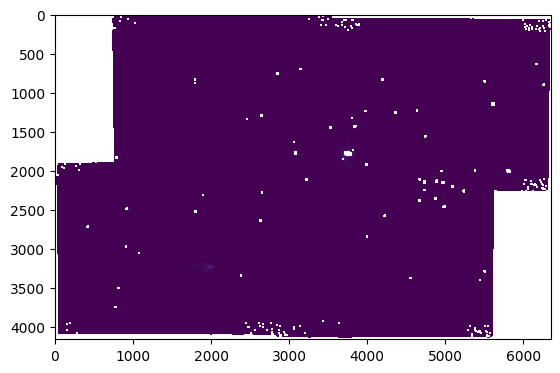

In [12]:
# Now load image and display it
im = af.tree['data']
print(im.shape)
plt.imshow(im)

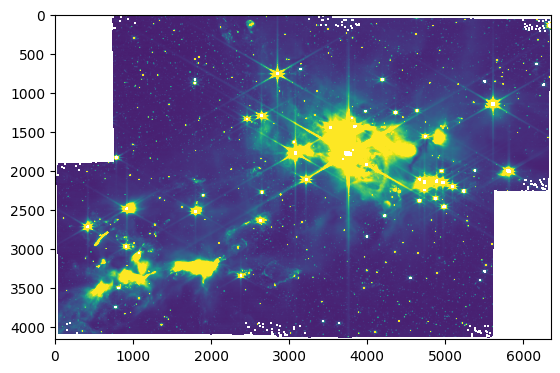

In [13]:
# Obviously we need to adjust the stretch on this. I've already found a reasonable one.
plt.clf()
plt.imshow(im, vmin=0, vmax=5)

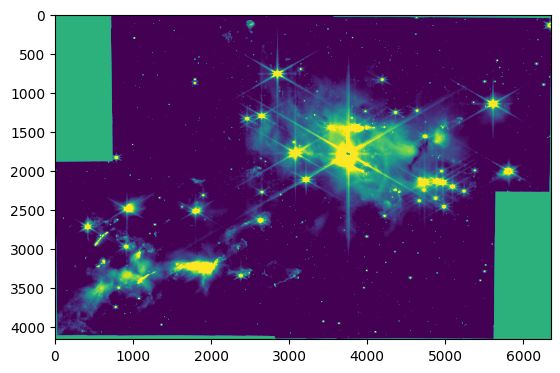

In [33]:
# To use a log transfer function means getting rid of all NaNs
nim = np.array(im) # Existing image is only read only and not a numpy array
nim[np.isnan(nim)] = 5
nim[nim<=0] = 1
plt.clf()
plt.imshow(np.log(nim), vmin=0, vmax=2.5)


Modifying the contents
----------------------

In [38]:
# Arbitrarily change the elapsed_exposure_time
af.tree['meta']['exposure']['elapsed_exposure_time'] = 1800
print(af.tree['meta']['exposure']['elapsed_exposure_time'])

1800


In [39]:
# Replace data attribute with the log version of the image.
af.tree['data'] = np.log(nim)

In [40]:
# Create new meta attribute
af.tree['meta']['inspected_by'] = 'Jacques Clouseau'

Saving the modified contents
----------------------------

In [41]:
# Save to a different file
af.write_to('jwst_modified.asdf')

In [42]:
ls

Introduction.ipynb          install/
Solutions_ADASS_2024.ipynb  jwst.asdf
Working_With_ASDF.ipynb     jwst_modified.asdf
asdf_demo.ipynb


Exercise
--------

- Search for the name of the PI ("Klaus") and replace the attribute containing it with your own name. Type "af.search?" to show how to search values instead of attribute names.
- Use the above log image and set all pixels in rows 3000:3010 and columns 4000:4010 to a value of 2.5, and replace the data attribute with the modified log image.
- Save the result to a new file named "jwst_exercise.asdf"
- Load that new file and display the data image
- Print out the value of the attribute that contains the name of the PI to confirm the edits were saved

In [45]:
af.search(value = "Klaus")

root (AsdfObject)
├─hdrtab (NDArrayType): shape=(24,), dtype=void31504
└─meta (dict)
  └─program (dict)
    └─pi_name (str): Pontoppidan, Klaus M.

In [44]:
af.search?

Signature: af.search(key=NotSet, type_=NotSet, value=NotSet, filter_=None)
Docstring:
Search this file's tree.

Parameters
----------
key : NotSet, str, or any other object
    Search query that selects nodes by dict key or list index.
    If NotSet, the node key is unconstrained.
    If str, the input is searched among keys/indexes as a regular
    expression pattern.
    If any other object, node's key or index must equal the queried key.

type_ : NotSet, str, or builtins.type
    Search query that selects nodes by type.
    If NotSet, the node type is unconstrained.
    If str, the input is searched among (fully qualified) node type
    names as a regular expression pattern.
    If builtins.type, the node must be an instance of the input.

value : NotSet, str, or any other object
    Search query that selects nodes by value.
    If NotSet, the node value is unconstrained.
    If str, the input is searched among values as a regular
    expression pattern.
    If any other object, nod

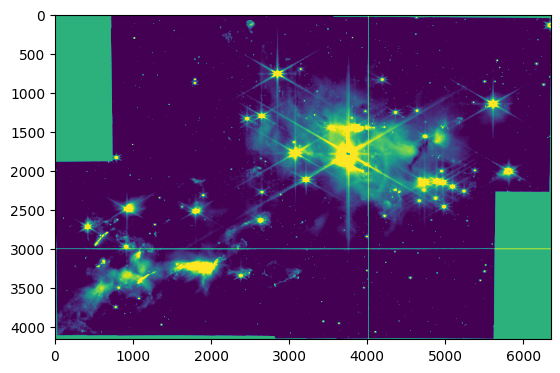

In [48]:
lim = np.log(nim)
lim[3000:3010, ] = 2.5
lim[:, 4000:4010] = 2.5
plt.clf()
plt.imshow(lim, vmin=0, vmax=2.5)